***Initia image is /nfs2/forGaurav/yesbackup/DAPI_reg/registration_GCA062ACA_TISSUE02***


In [3]:
from PIL import Image
import numpy as np
import os
import glob
from tqdm import tqdm
from ants_reg import ImageRegistration
import ants

In [29]:
##Defining the directories
original_dir = '/nfs2/baos1/rudravg/GCA075ACB_TISSUE01*.tif'
output_dir = '/nfs2/baos1/rudravg/registration'

orig_files = glob.glob(original_dir)
orig_files.sort(key=lambda x: int(x.split('/')[-1].split('_')[-3]))

fixed_file=orig_files[0]
fixed_file

'/nfs2/baos1/rudravg/GCA075ACB_TISSUE01_DAPI_DAPI_12ms_ROUND_00_initial_reg.tif'

In [28]:
orig_files

['/nfs2/baos1/rudravg/GCA112ACB_DAPI_DAPI_30ms_ROUND_00_initial_reg.tif',
 '/nfs2/baos1/rudravg/GCA112ACB_DAPI_DAPI_14ms_ROUND_01_initial_reg.tif',
 '/nfs2/baos1/rudravg/GCA112ACB_DAPI_DAPI_14ms_ROUND_02_initial_reg.tif',
 '/nfs2/baos1/rudravg/GCA112ACB_DAPI_DAPI_12ms_ROUND_03_initial_reg.tif',
 '/nfs2/baos1/rudravg/GCA112ACB_DAPI_DAPI_12ms_ROUND_04_initial_reg.tif',
 '/nfs2/baos1/rudravg/GCA112ACB_DAPI_DAPI_12ms_ROUND_05_initial_reg.tif',
 '/nfs2/baos1/rudravg/GCA112ACB_DAPI_DAPI_12ms_ROUND_06_initial_reg.tif',
 '/nfs2/baos1/rudravg/GCA112ACB_DAPI_DAPI_12ms_ROUND_07_initial_reg.tif',
 '/nfs2/baos1/rudravg/GCA112ACB_DAPI_DAPI_12ms_ROUND_08_initial_reg.tif',
 '/nfs2/baos1/rudravg/GCA112ACB_DAPI_DAPI_12ms_ROUND_09_initial_reg.tif',
 '/nfs2/baos1/rudravg/GCA112ACB_DAPI_DAPI_12ms_ROUND_10_initial_reg.tif',
 '/nfs2/baos1/rudravg/GCA112ACB_DAPI_DAPI_12ms_ROUND_11_initial_reg.tif',
 '/nfs2/baos1/rudravg/GCA112ACB_DAPI_DAPI_12ms_ROUND_12_initial_reg.tif',
 '/nfs2/baos1/rudravg/GCA112ACB_DAPI_D

***Registration Cell***

In [30]:
prefix1='registration_'+(fixed_file.split('/')[-1].split('_')[0])+'_'+(fixed_file.split('/')[-1].split('_')[1])+'/'
os.makedirs(os.path.join(output_dir, prefix1, 'rigid'), exist_ok=True)
os.makedirs(os.path.join(output_dir, prefix1, 'affine'), exist_ok=True)
#os.makedirs(os.path.join(output_dir, prefix1, 'syn'), exist_ok=True)
for file in tqdm(orig_files[1:]):
    moving_file = file
    reg = ImageRegistration(fixed_file, moving_file)
    rigid=reg.register_rigid()
    affine=reg.register_affine()
    #syn=reg.register_syn_aggro()
    #Save rigid with the file name in the output directory/rigid
    ants.image_write(rigid, os.path.join(output_dir, prefix1, 'rigid', file.split('/')[-1]))
    #Save affine with the file name in the output directory/affine
    ants.image_write(affine, os.path.join(output_dir, prefix1, 'affine', file.split('/')[-1]))
    #Save syn with the file name in the output directory/syn
    #ants.image_write(syn, os.path.join(output_dir, prefix1, 'syn', file.split('/')[-1]))

100%|██████████| 17/17 [17:34<00:00, 62.03s/it]


***Rigid Registration Metrics(Fully Functional)***

In [3]:
from metrics import Metrics
rigid_files = glob.glob('/nfs2/baos1/rudravg/registration_GCA062ACA_TISSUE02/rigid/*.tif')
rigid_files.sort(key=lambda x: int(x.split('/')[-1].split('_')[-3]))
metrics_nmi=[1]
metrics_smi=[1]
metrics_dice=[1]
mask=np.array(Image.open('/nfs2/baos1/rudravg/Retention_Masks/GCA062ACA_TISSUE02_TISSUE_RETENTION.tif'))
mask = (mask > 0).astype(int)
fixed_img=np.array(Image.open(fixed_file))
fixed_img = fixed_img*mask
for rigid_file in tqdm(rigid_files):
    new_img=np.array(Image.open(rigid_file))
    new_img = new_img*mask
    metrics = Metrics(fixed_img, new_img)
    metrics_nmi.append(metrics.calculate_normalized_mutual_information())
    metrics_smi.append(metrics.calculate_ssim())
print(metrics_nmi)
print(metrics_smi)

100%|██████████| 19/19 [00:38<00:00,  2.00s/it]

[1, 0.3998824610230388, 0.38540891425943086, 0.3929840855881592, 0.37199318221256217, 0.3790426081066798, 0.3704153848797254, 0.3596475125570731, 0.35951659415254245, 0.3656330087097666, 0.3621954796833925, 0.3656296415651878, 0.361423129331587, 0.3695373651442035, 0.36745399594471356, 0.36867376763696397, 0.37877788265876666, 0.37035713579912566, 0.3869071533125035, 0.38015428055159195]
[1, 0.8641099825984778, 0.7967378750028509, 0.8818281348623364, 0.8362828527895704, 0.8496679360847694, 0.8375739706802758, 0.8486452749816973, 0.8396295830732584, 0.8699016231610085, 0.8652969727624795, 0.8776494329220719, 0.8638919172555263, 0.8810567897800865, 0.8727476116855599, 0.8849297088420492, 0.8919325118911013, 0.8826707195102231, 0.9018095146593895, 0.8933746130560566]


***Rigid Registration Metrics, including dice(Trial)***

In [28]:
from metrics import Metrics
rigid_files = glob.glob('/nfs2/baos1/rudravg/registration_GCA112TIA/rigid/*.tif')
rigid_files.sort(key=lambda x: int(x.split('/')[-1].split('_')[-3]))
metrics_nmi=[1]
metrics_smi=[1]
metrics_dice=[1]
mask=np.array(Image.open('/nfs2/baos1/rudravg/Retention_Masks/GCA112TIA_TISSUE_RETENTION.tif'))
mask = (mask > 0).astype(int)
fixed_img=np.array(Image.open(fixed_file))
fixed_img = fixed_img*mask
for rigid_file in tqdm(rigid_files):
    new_img=np.array(Image.open(rigid_file))
    new_img = new_img*mask
    metrics = Metrics(fixed_img, new_img)
    metrics_nmi.append(metrics.calculate_normalized_mutual_information())
    metrics_smi.append(metrics.calculate_ssim())
print(metrics_nmi)
print(metrics_smi)

rigid_dice_files = glob.glob('/nfs2/baos1/rudravg/registration_GCA112TIA/rigid/DeepCell_Results/*.tif')
rigid_dice_files.sort(key=lambda x: int(x.split('/')[-1].split('_')[-3]))
fixed_dice='/nfs2/baos1/rudravg/DeepCell_Results/GCA112TIA_DAPI_DAPI_30ms_ROUND_00_initial_reg.tif'
fixed_dice_img=np.array(Image.open(fixed_dice))
fixed_dice_img = fixed_dice_img*mask
for rigid_file in tqdm(rigid_dice_files,desc='Dice metrics'):
    new_dice_img=np.array(Image.open(rigid_file))
    new_dice_img = new_dice_img*mask
    metrics_d = Metrics(fixed_dice_img, new_dice_img)
    metrics_dice.append(metrics_d.calculate_dice())

  0%|          | 0/19 [00:00<?, ?it/s]

100%|██████████| 19/19 [00:07<00:00,  2.39it/s]


[1, 0.5049115568361544, 0.4696090767956377, 0.4844249268639097, 0.4660357009841887, 0.4661952976373135, 0.46368034216066123, 0.4689698328420724, 0.4643821839942198, 0.46770764088668804, 0.44082076783148383, 0.4433763731698595, 0.43862861540332726, 0.4507083138704551, 0.4520934102678943, 0.4541146241631838, 0.4480907767292781, 0.45410262867559753, 0.45068643658407154, 0.4399304641074949]
[1, 0.9647719778852216, 0.9336230582490341, 0.9525680388809072, 0.9413697809301892, 0.9397400540450522, 0.9454235082963041, 0.9344176799109181, 0.9396176798249076, 0.9174956844534368, 0.9056571794226247, 0.8865727918306878, 0.904080272714813, 0.8841965537415416, 0.8756801408555346, 0.8840141298386044, 0.8939265200020277, 0.9014329897199554, 0.9035552972698478, 0.8956106682552257]


Dice metrics: 100%|██████████| 19/19 [00:00<00:00, 23.37it/s]


***Plotting Rigid Registration Metrics***

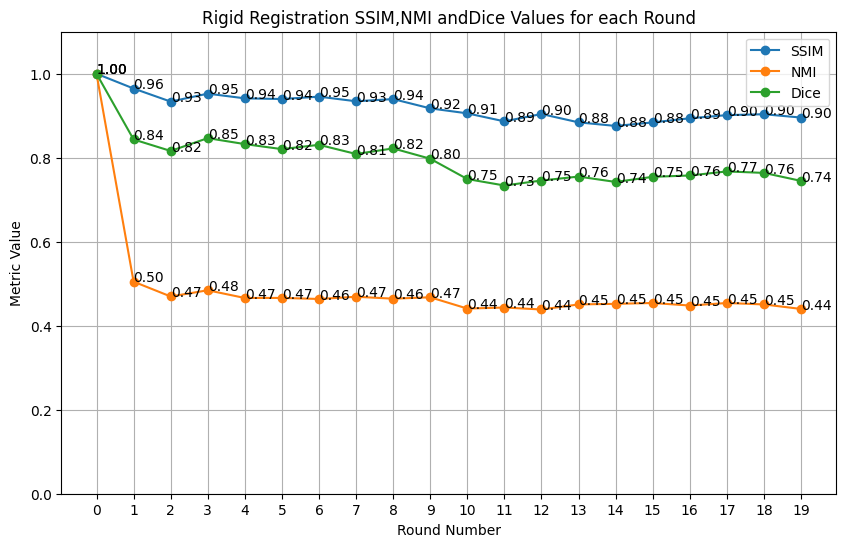

In [29]:
import matplotlib.pyplot as plt
x= range(len(metrics_smi))

plt.figure(figsize=(10, 6))
plt.plot(x, metrics_smi, marker='o', label='SSIM')  # 'o' marker to show each point
plt.plot(x, metrics_nmi, marker='o', label='NMI')  # 'o' marker to show each point
plt.plot(x, metrics_dice, marker='o', label='Dice')  # 'o' marker to show each point

# Adding titles and labels
plt.title('Rigid Registration SSIM,NMI andDice Values for each Round')
plt.xlabel('Round Number')
plt.ylabel('Metric Value')


# Adding y-values on each point for SSIM
for i, txt in enumerate(metrics_smi):
    plt.annotate(f"{txt:.2f}", (x[i], metrics_smi[i]))

# Adding y-values on each point for NMI
for i, txt in enumerate(metrics_nmi):
    plt.annotate(f"{txt:.2f}", (x[i], metrics_nmi[i]))

# Adding y-values on each point for Dice
for i, txt in enumerate(metrics_dice):
    plt.annotate(f"{txt:.2f}", (x[i], metrics_dice[i]))

plt.ylim(0,1.1)
plt.grid(True)
plt.xticks(x)  # Ensure x-axis ticks correspond to whole numbers
plt.legend()  # Show legend
plt.show()

***Affine Registration Metrics Calculation***

In [41]:
from metrics import Metrics
rigid_files = glob.glob('/nfs2/baos1/rudravg/registration_GCA062ACA_TISSUE02/affine/*.tif')
rigid_files.sort(key=lambda x: int(x.split('/')[-1].split('_')[-3]))
metrics_nmi=[1]
metrics_smi=[1]
metrics_dice=[1]
mask=np.array(Image.open('/nfs2/baos1/rudravg/Retention_Masks/GCA062ACA_TISSUE02_TISSUE_RETENTION.tif'))
mask = (mask > 0).astype(int)
fixed_img=np.array(Image.open(fixed_file))
fixed_img = fixed_img*mask
for rigid_file in tqdm(rigid_files):
    new_img=np.array(Image.open(rigid_file))
    new_img = new_img*mask
    metrics = Metrics(fixed_img, new_img)
    metrics_nmi.append(metrics.calculate_normalized_mutual_information())
    metrics_smi.append(metrics.calculate_ssim())
print(metrics_nmi)
print(metrics_smi)

rigid_dice_files = glob.glob('/nfs2/baos1/rudravg/registration_GCA062ACA_TISSUE02/affine/DeepCell_Results/*.tif')
rigid_dice_files.sort(key=lambda x: int(x.split('/')[-1].split('_')[-3]))
fixed_dice='/nfs2/baos1/rudravg/DeepCell_Results/GCA062ACA_TISSUE02_DAPI_DAPI_12ms_ROUND_00_initial_reg.tif'
fixed_dice_img=np.array(Image.open(fixed_dice))
fixed_dice_img = fixed_dice_img*mask
for rigid_file in tqdm(rigid_dice_files,desc='Dice metrics'):
    new_dice_img=np.array(Image.open(rigid_file))
    new_dice_img = new_dice_img*mask
    metrics_d = Metrics(fixed_dice_img, new_dice_img)
    metrics_dice.append(metrics_d.calculate_dice())

100%|██████████| 17/17 [00:34<00:00,  2.03s/it]


[1, 0.4876280283024566, 0.9223200235840694, 0.5329084965332616, 0.515414505593627, 0.46475219782940347, 0.4577095500203911, 0.4568919093111624, 0.4511983002626646, 0.4586853723743888, 0.44867645123251837, 0.43527006735992396, 0.4405827366727603, 0.44034140564200774, 0.44251538673657315, 0.44079257555234114, 0.427234099811798, 0.4309738311534844]
[1, 0.9467282912790762, 0.9999967605768415, 0.9236455300889511, 0.9480810100853158, 0.9535681680236002, 0.9555956772229453, 0.9537800265280355, 0.942331159412197, 0.9476596981102373, 0.9443368925570864, 0.9372113924674714, 0.9314925298984964, 0.9293650516951653, 0.9192429248471571, 0.9291232516487513, 0.917054515044189, 0.9200486592194915]


Dice metrics: 100%|██████████| 17/17 [00:02<00:00,  5.78it/s]


***Plotting Affine Registration Metrics***

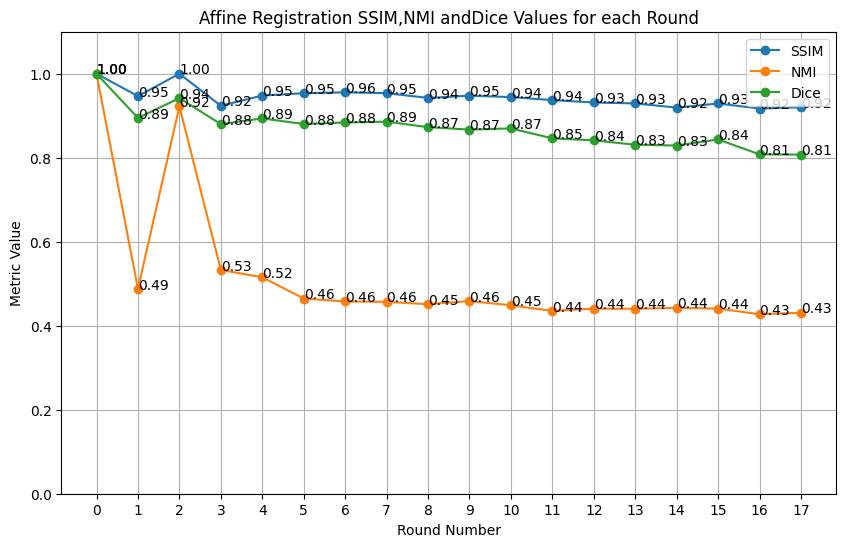

In [42]:
x= range(len(metrics_smi))

plt.figure(figsize=(10, 6))
plt.plot(x, metrics_smi, marker='o', label='SSIM')  # 'o' marker to show each point
plt.plot(x, metrics_nmi, marker='o', label='NMI')  # 'o' marker to show each point
plt.plot(x, metrics_dice, marker='o', label='Dice')  # 'o' marker to show each point

# Adding titles and labels
plt.title('Affine Registration SSIM,NMI andDice Values for each Round')
plt.xlabel('Round Number')
plt.ylabel('Metric Value')


# Adding y-values on each point for SSIM
for i, txt in enumerate(metrics_smi):
    plt.annotate(f"{txt:.2f}", (x[i], metrics_smi[i]))

# Adding y-values on each point for NMI
for i, txt in enumerate(metrics_nmi):
    plt.annotate(f"{txt:.2f}", (x[i], metrics_nmi[i]))

# Adding y-values on each point for Dice
for i, txt in enumerate(metrics_dice):
    plt.annotate(f"{txt:.2f}", (x[i], metrics_dice[i]))
plt.ylim(0,1.1)
plt.grid(True)
plt.xticks(x)  # Ensure x-axis ticks correspond to whole numbers
plt.legend()  # Show legend
plt.show()

***SyN metrics calculation***

In [36]:
from metrics import Metrics
rigid_files = glob.glob('/nfs2/baos1/rudravg/registration_GCA118ACB_TISSUE01/SyN/*.tif')
rigid_files.sort(key=lambda x: int(x.split('/')[-1].split('_')[-3]))
metrics_nmi=[1]
metrics_smi=[1]
metrics_dice=[1]
mask=np.array(Image.open('/nfs2/baos1/rudravg/Retention_Masks/GCA118ACB_TISSUE01_TISSUE_RETENTION.tif'))
mask = (mask > 0).astype(int)
fixed_img=np.array(Image.open(fixed_file))
fixed_img = fixed_img*mask
for rigid_file in tqdm(rigid_files):
    new_img=np.array(Image.open(rigid_file))
    new_img = new_img*mask
    metrics = Metrics(fixed_img, new_img)
    metrics_nmi.append(metrics.calculate_normalized_mutual_information())
    metrics_smi.append(metrics.calculate_ssim())
print(metrics_nmi)
print(metrics_smi)

rigid_dice_files = glob.glob('/nfs2/baos1/rudravg/registration_GCA118ACB_TISSUE01/SyN/DeepCell_Results/*.tif')
rigid_dice_files.sort(key=lambda x: int(x.split('/')[-1].split('_')[-3]))
fixed_dice='/nfs2/baos1/rudravg/DeepCell_Results/GCA118ACB_TISSUE01_DAPI_DAPI_30ms_ROUND_00_initial_reg.tif'
fixed_dice_img=np.array(Image.open(fixed_dice))
fixed_dice_img = fixed_dice_img*mask
for rigid_file in tqdm(rigid_dice_files,desc='Dice metrics'):
    new_dice_img=np.array(Image.open(rigid_file))
    new_dice_img = new_dice_img*mask
    metrics_d = Metrics(fixed_dice_img, new_dice_img)
    metrics_dice.append(metrics_d.calculate_dice())

100%|██████████| 19/19 [00:37<00:00,  1.99s/it]


[1, 0.46944963437748555, 0.45807457457457396, 0.46248674072123747, 0.43363161510452614, 0.44281262378010244, 0.43069605031529457, 0.4159154691185762, 0.41578902892545344, 0.41932254767090277, 0.4141878264624914, 0.415446302467133, 0.4152559645675562, 0.42115352901218417, 0.41427762552562153, 0.4171539780267356, 0.43396208930572333, 0.4200176380544095, 0.44582370464555937, 0.44274927180047835]
[1, 0.8667259936176475, 0.7839495592479034, 0.8901638050859263, 0.8319523237406458, 0.8456548982878934, 0.8306304586684511, 0.8516229125904559, 0.836554542625621, 0.8764717697580091, 0.8704546418893585, 0.8912022789733351, 0.8700254075514623, 0.8945828968674826, 0.8853790566371519, 0.8970913240679625, 0.903113501148088, 0.8963127619304474, 0.9174550340043612, 0.9065361877539642]


Dice metrics: 100%|██████████| 19/19 [00:03<00:00,  6.06it/s]


***Plotting SyN Metrics***

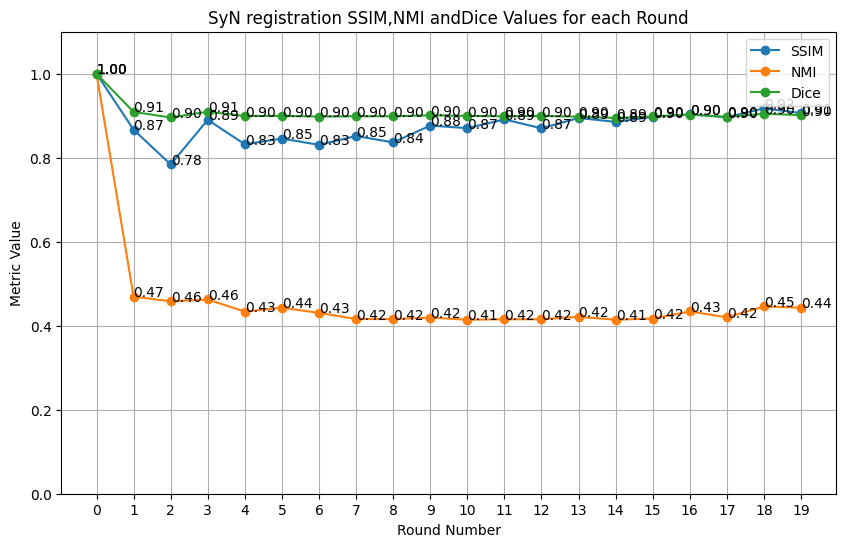

In [37]:
x= range(len(metrics_smi))

plt.figure(figsize=(10, 6))
plt.plot(x, metrics_smi, marker='o', label='SSIM')  # 'o' marker to show each point
plt.plot(x, metrics_nmi, marker='o', label='NMI')  # 'o' marker to show each point
plt.plot(x, metrics_dice, marker='o', label='Dice')  # 'o' marker to show each point

# Adding titles and labels
plt.title('SyN registration SSIM,NMI andDice Values for each Round')
plt.xlabel('Round Number')
plt.ylabel('Metric Value')


# Addingclear y-values on each point for SSIM
for i, txt in enumerate(metrics_smi):
    plt.annotate(f"{txt:.2f}", (x[i], metrics_smi[i]))

# Adding y-values on each point for NMI
for i, txt in enumerate(metrics_nmi):
    plt.annotate(f"{txt:.2f}", (x[i], metrics_nmi[i]))

# Adding y-values on each point for Dice
for i, txt in enumerate(metrics_dice):
    plt.annotate(f"{txt:.2f}", (x[i], metrics_dice[i]))

plt.ylim(0,1.1)
plt.grid(True)
plt.xticks(x)  # Ensure x-axis ticks correspond to whole numbers
plt.legend()  # Show legend
plt.show()

In [ ]:
from metrics import Metrics
rigid_files = glob.glob('/nfs2/baos1/rudravg/GCA062ACA_TISSUE02*.tif')
rigid_files.sort(key=lambda x: int(x.split('/')[-1].split('_')[-3]))
metrics_nmi=[]
metrics_smi=[]
mask=np.array(Image.open('/nfs2/baos1/rudravg/Retention_Masks/GCA062ACA_TISSUE02_TISSUE_RETENTION.tif'))
mask = (mask > 0).astype(int)
fixed_img=np.array(Image.open(fixed_file))
fixed_img = fixed_img*mask
for rigid_file in tqdm(rigid_files):
    new_img=np.array(Image.open(rigid_file))
    new_img = new_img*mask
    metrics = Metrics(fixed_img, new_img)
    metrics_nmi.append(metrics.calculate_normalized_mutual_information())
    metrics_smi.append(metrics.calculate_ssim())
print(metrics_nmi)
print(metrics_smi)

In [ ]:
x= range(len(metrics_smi))

plt.figure(figsize=(10, 6))
plt.plot(x, metrics_smi, marker='o', label='SSIM')  # 'o' marker to show each point
plt.plot(x, metrics_nmi, marker='o', label='NMI')  # 'o' marker to show each point
#plt.plot(x, metric_dice, marker='o', label='Dice')  # 'o' marker to show each point

# Adding titles and labels
plt.title('SSIM,NMI andDice Values for each Round')
plt.xlabel('Round Number')
plt.ylabel('Metric Value')


# Adding y-values on each point for SSIM
for i, txt in enumerate(metrics_smi):
    plt.annotate(f"{txt:.2f}", (x[i], metrics_smi[i]))

# Adding y-values on each point for NMI
for i, txt in enumerate(metrics_nmi):
    plt.annotate(f"{txt:.2f}", (x[i], metrics_nmi[i]))

# Adding y-values on each point for Dice
#for i, txt in enumerate(metrics_dice):
#    plt.annotate(f"{txt:.2f}", (x[i], metric_dice[i]))

plt.grid(True)
plt.xticks(x)  # Ensure x-axis ticks correspond to whole numbers
plt.legend()  # Show legend
plt.show()